<a href="https://colab.research.google.com/github/Tsion-Ketema/Image-processing-assignment-No-4/blob/main/Image_processing_assignment_No_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Assignment 4 - Edge Detection
### Name: Tsion Ketema Araya

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/weizmann_horse_db/horse"
mask_path = "/content/drive/MyDrive/weizmann_horse_db/mask"

print("Total horse images:", len(os.listdir(dataset_path)))
print("Total mask images:", len(os.listdir(mask_path)))

# Select three images
image1_path = os.path.join(dataset_path, "horse004.png")
image2_path = os.path.join(dataset_path, "horse080.png")
image3_path = os.path.join(dataset_path, "horse007.png")


Total horse images: 327
Total mask images: 327


Original Image 1:


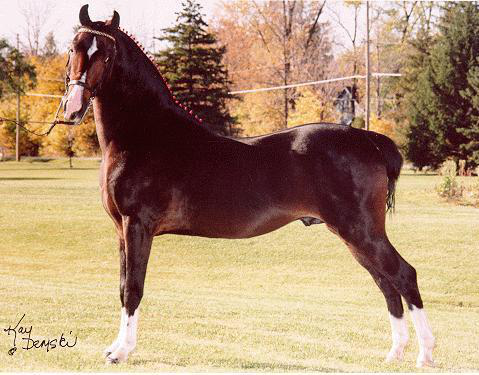

Original Image 2:


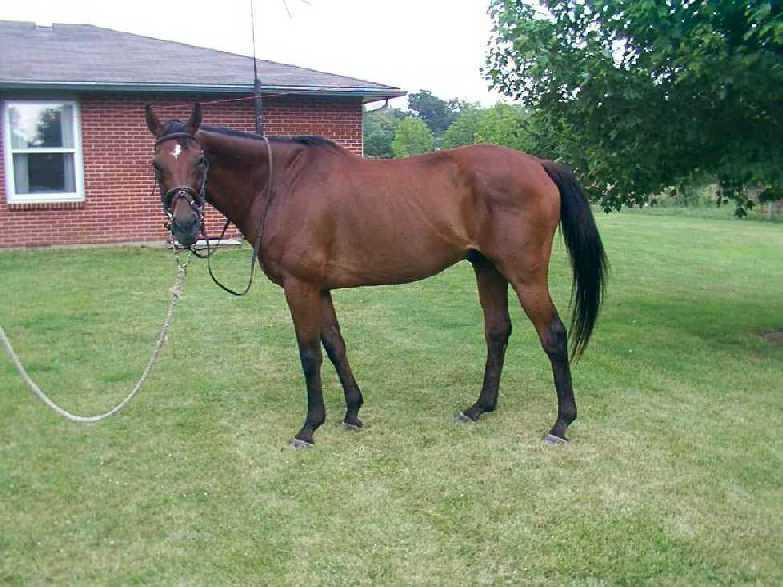

Original Image 3:


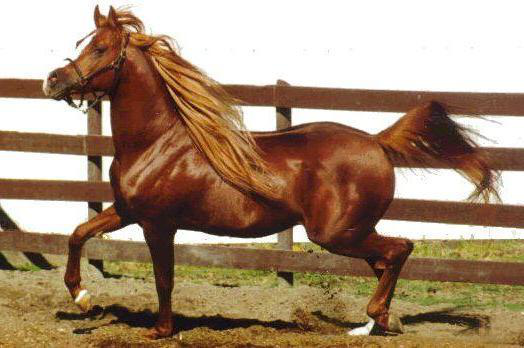

In [ ]:
from IPython.display import display
from PIL import Image

# Load images using PIL and display them
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)
image3 = Image.open(image3_path)

print("Original Image 1:")
display(image1)

print("Original Image 2:")
display(image2)

print("Original Image 3:")
display(image3)


In [ ]:
def read_image_as_2D_list(image_path):
    """
    Reads an image file and converts it into a grayscale 2D list.
    """
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    width, height = img.size
    image = [[img.getpixel((j, i)) for j in range(width)] for i in range(height)]

    return image

# Convert images to grayscale 2D lists
image1_gray = read_image_as_2D_list(image1_path)
image2_gray = read_image_as_2D_list(image2_path)
image3_gray = read_image_as_2D_list(image3_path)


In [ ]:
def convolve2D_manual(image, kernel):
    """
    Perform 2D convolution manually.

    image: 2D list representing grayscale image.
    kernel: 2D list representing filter.

    Returns: 2D list of filtered image.
    """
    img_height = len(image)
    img_width = len(image[0])
    kernel_height = len(kernel)
    kernel_width = len(kernel[0])

    output_height = img_height - kernel_height + 1
    output_width = img_width - kernel_width + 1

    output = [[0] * output_width for _ in range(output_height)]

    for i in range(output_height):
        for j in range(output_width):
            sum_value = 0
            for ki in range(kernel_height):
                for kj in range(kernel_width):
                    sum_value += image[i + ki][j + kj] * kernel[ki][kj]
            output[i][j] = sum_value

    return output


In [ ]:
def roberts_edge_detection(image):
    roberts_x = [[1, 0], [0, -1]]
    roberts_y = [[0, 1], [-1, 0]]

    gx = convolve2D_manual(image, roberts_x)
    gy = convolve2D_manual(image, roberts_y)

    return [[(gx[i][j]**2 + gy[i][j]**2)**0.5 for j in range(len(gx[0]))] for i in range(len(gx))]


In [ ]:
def prewitt_edge_detection(image):
    prewitt_x = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
    prewitt_y = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]

    gx = convolve2D_manual(image, prewitt_x)
    gy = convolve2D_manual(image, prewitt_y)

    return [[(gx[i][j]**2 + gy[i][j]**2)**0.5 for j in range(len(gx[0]))] for i in range(len(gx))]


In [ ]:
def sobel_edge_detection(image):
    sobel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    sobel_y = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

    gx = convolve2D_manual(image, sobel_x)
    gy = convolve2D_manual(image, sobel_y)

    return [[(gx[i][j]**2 + gy[i][j]**2)**0.5 for j in range(len(gx[0]))] for i in range(len(gx))]


In [ ]:
# Apply edge detection to all three images
roberts_result1 = roberts_edge_detection(image1_gray)
prewitt_result1 = prewitt_edge_detection(image1_gray)
sobel_result1 = sobel_edge_detection(image1_gray)

roberts_result2 = roberts_edge_detection(image2_gray)
prewitt_result2 = prewitt_edge_detection(image2_gray)
sobel_result2 = sobel_edge_detection(image2_gray)

roberts_result3 = roberts_edge_detection(image3_gray)
prewitt_result3 = prewitt_edge_detection(image3_gray)
sobel_result3 = sobel_edge_detection(image3_gray)



### Edge Detection for Image 1 ###
Roberts Edge Detection - Image 1


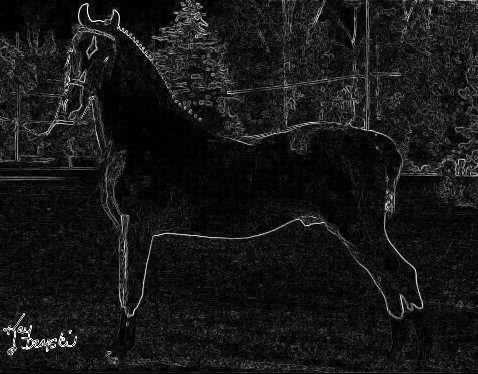

Prewitt Edge Detection - Image 1


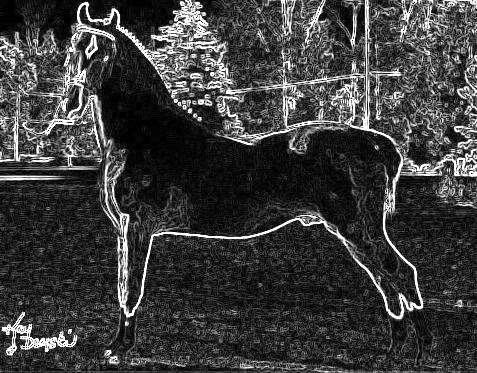

Sobel Edge Detection - Image 1


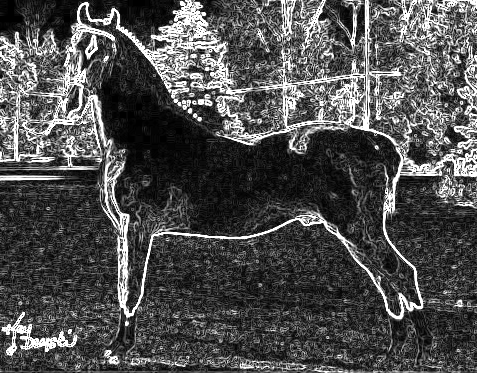


### Edge Detection for Image 2 ###
Roberts Edge Detection - Image 2


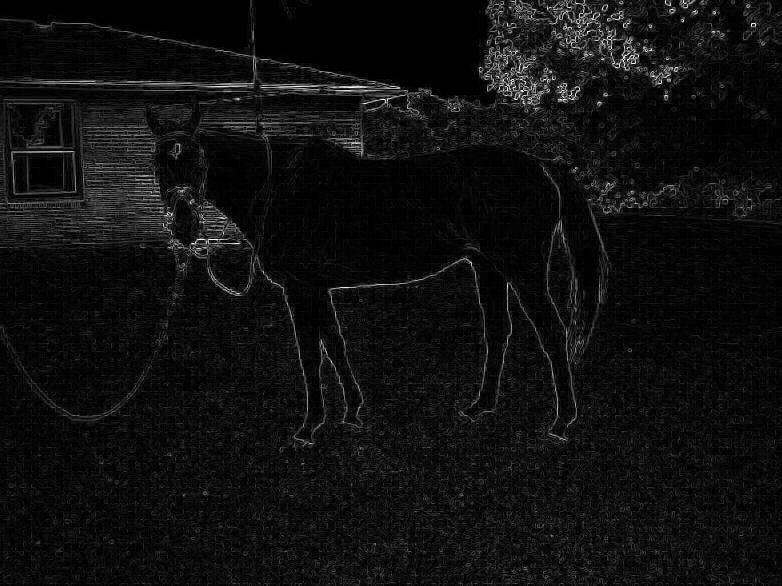

Prewitt Edge Detection - Image 2


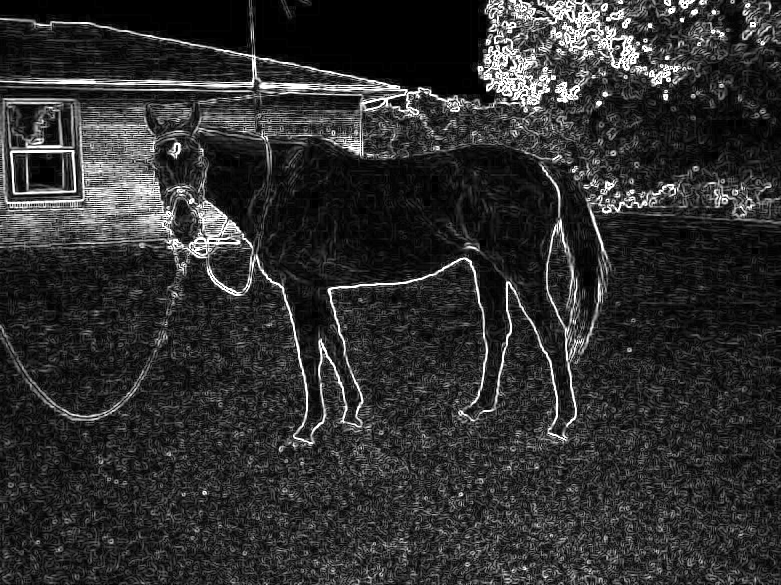

Sobel Edge Detection - Image 2


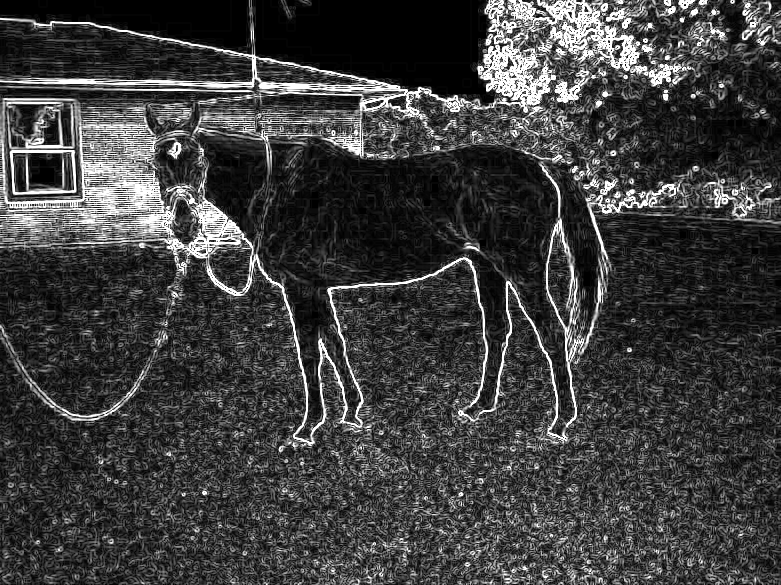


### Edge Detection for Image 3 ###
Roberts Edge Detection - Image 3


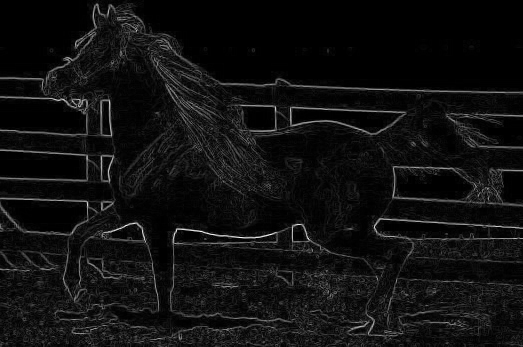

Prewitt Edge Detection - Image 3


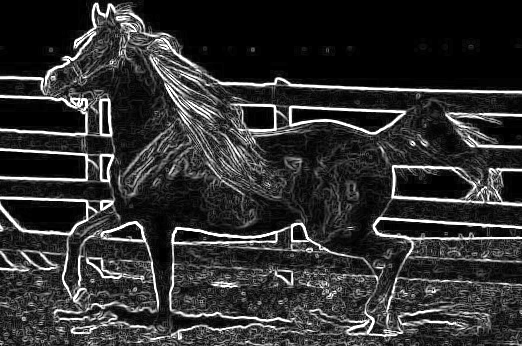

Sobel Edge Detection - Image 3


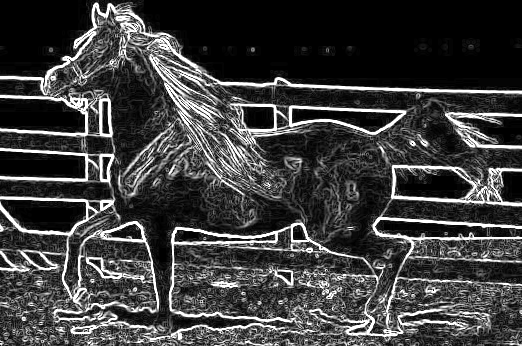

In [ ]:
def convert_to_pil_image(image_list):
    """ Converts a 2D list of grayscale values into a PIL image. """
    height = len(image_list)
    width = len(image_list[0])
    img = Image.new("L", (width, height))

    for i in range(height):
        for j in range(width):
            img.putpixel((j, i), int(image_list[i][j]))

    return img

# List of images
images = [roberts_result1, prewitt_result1, sobel_result1], \
         [roberts_result2, prewitt_result2, sobel_result2], \
         [roberts_result3, prewitt_result3, sobel_result3]

# Image names
image_names = ["Image 1", "Image 2", "Image 3"]
filter_names = ["Roberts", "Prewitt", "Sobel"]

# Convert and display results for one image at a time
for i in range(3):  # Loop through each image
    print(f"\n### Edge Detection for {image_names[i]} ###")

    for j in range(3):  # Apply all 3 filters sequentially
        edge_image = convert_to_pil_image(images[i][j])  # Convert 2D list to image

        print(f"{filter_names[j]} Edge Detection - {image_names[i]}")
        display(edge_image)  # Display the image

